In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("train_LZdllcl.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
# remove emp_id as it is identifier colum
df.drop("employee_id",axis=1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [5]:
#fill the eduction data with mode
df["education"]=df["education"].fillna(df["education"].mode()[0])


In [6]:
# fill the null rating values with mean
df["previous_year_rating"]=df["previous_year_rating"].fillna(df["previous_year_rating"].mean())

In [7]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [8]:
df["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [9]:
df["region"].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [10]:
df["education"].unique()
education_order_dict={
    "Master's & above":3,
    "Bachelor's":2,
    "Below Secondary":1
}
education_order_dict

{"Master's & above": 3, "Bachelor's": 2, 'Below Secondary': 1}

In [11]:
df["gender"].unique()

array(['f', 'm'], dtype=object)

In [12]:
df["recruitment_channel"].unique()


array(['sourcing', 'other', 'referred'], dtype=object)

In [13]:
df_gender_channel_dummies=pd.get_dummies(df[["gender","recruitment_channel"]],drop_first=True)

In [14]:
df_gender_channel_dummies

,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,1
1,1,0,0
2,1,0,1
3,1,0,0
4,1,0,0
5,1,0,1
6,0,0,0
7,1,0,1
8,1,0,0
9,1,0,1


In [15]:
df=pd.concat([df,df_gender_channel_dummies],axis=1)

In [16]:
df["education_encoded"]=df["education"].apply(lambda x:education_order_dict[x])

In [17]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,education_encoded
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0,1,3
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,1,0,0,2
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,1,0,1,2
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1,0,0,2
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1,0,0,2


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df["dept_encode"]=le.fit_transform(df["department"])

In [20]:
df["region_encode"]=le.fit_transform(df["region"])

In [22]:
df.drop(["employee_id","gender","recruitment_channel","education","department","region"],axis=1,inplace=True)

In [23]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,education_encoded,dept_encode,region_encode
0,1,35,5.0,8,1,0,49,0,0,0,1,3,7,31
1,1,30,5.0,4,0,0,60,0,1,0,0,2,4,14
2,1,34,3.0,7,0,0,50,0,1,0,1,2,7,10
3,2,39,1.0,10,0,0,50,0,1,0,0,2,7,15
4,1,45,3.0,2,0,0,73,0,1,0,0,2,8,18


In [27]:
## check if data is balanced or not
df["is_promoted"].value_counts()


# 0    50140
# 1     4668
# imbalanced dataset


0    50140
1     4668
Name: is_promoted, dtype: int64

In [28]:
y=df["is_promoted"]
X=df.drop("is_promoted",axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=23,test_size=.2)

In [30]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

43846 10962 43846 10962


In [31]:
from sklearn.preprocessing import StandardScaler
std_sclr=StandardScaler()

In [32]:
X_train_scaled=std_sclr.fit_transform(X_train)

In [33]:
from sklearn.linear_model import LogisticRegressionCV

In [34]:
logistic_reg_cv=LogisticRegressionCV(cv=10)

In [35]:
regressor=logistic_reg_cv.fit(X_train_scaled,y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [36]:
X_test_scaled=std_sclr.transform(X_test)

In [37]:
y_pred=regressor.predict(X_test_scaled)

In [58]:
from sklearn.metrics import accuracy_score,classification_report
import sklearn.metrics as metrics

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10027
           1       0.63      0.08      0.14       935

    accuracy                           0.92     10962
   macro avg       0.77      0.54      0.55     10962
weighted avg       0.90      0.92      0.89     10962



In [62]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

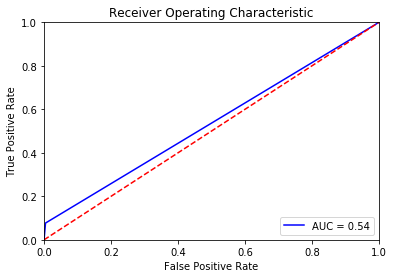

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rndm_frst_clssifier=RandomForestClassifier(n_estimators=10)

In [53]:
rndm_frst_clssifier.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
y_rnd_frst_class_pred=rndm_frst_clssifier.predict(X_test_scaled)

In [55]:
print(classification_report(y_test,y_rnd_frst_class_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10027
           1       0.74      0.23      0.35       935

    accuracy                           0.93     10962
   macro avg       0.84      0.61      0.66     10962
weighted avg       0.92      0.93      0.91     10962



In [59]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_rnd_frst_class_pred)
roc_auc = metrics.auc(fpr, tpr)

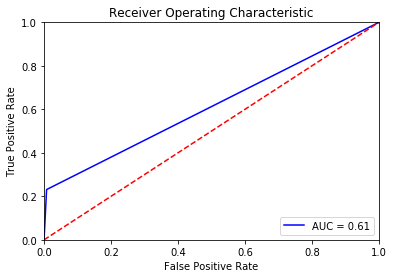

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
from sklearn.model_selection import cross_val_score

In [99]:
cross_val_score(logistic_reg_cv,X,y,cv=10)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\A

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logi

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logi

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\A

array([0.91935778, 0.91662105, 0.91534392, 0.91607371, 0.91662105,
       0.9168035 , 0.91899288, 0.91625616, 0.91770073, 0.91770073])

In [95]:
df_toPredict=pd.read_csv("test_2umaH9m.csv")
df_toPredict.head()
df_toPredict_copy=df_toPredict.copy(deep=True)
df_toPredict.count()

employee_id             23490
department              23490
region                  23490
education               22456
gender                  23490
recruitment_channel     23490
no_of_trainings         23490
age                     23490
previous_year_rating    21678
length_of_service       23490
KPIs_met >80%           23490
awards_won?             23490
avg_training_score      23490
dtype: int64

In [89]:
df_toPredict["education"]=df_toPredict["education"].fillna(df_toPredict["education"].mode()[0])

df_toPredict["previous_year_rating"]=df_toPredict["previous_year_rating"].fillna(df_toPredict["previous_year_rating"].mean())

df_toPredict_gender_channel_dummies=pd.get_dummies(df_toPredict[["gender","recruitment_channel"]],drop_first=True)

df_toPredict=pd.concat([df_toPredict,df_toPredict_gender_channel_dummies],axis=1)

df_toPredict["education_encoded"]=df_toPredict["education"].apply(lambda x:education_order_dict[x])

df_toPredict["dept_encode"]=le.fit_transform(df_toPredict["department"])

df_toPredict["region_encode"]=le.fit_transform(df_toPredict["region"])

df_toPredict.drop(["employee_id","gender","recruitment_channel","education","department","region"],axis=1,inplace=True)

In [90]:
df_toPredict

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,education_encoded,dept_encode,region_encode
0,1,24,3.339146,1,1,0,77,1,0,1,2,8,18
1,1,31,3.000000,5,0,0,51,0,0,0,2,2,28
2,1,31,1.000000,4,0,0,47,1,0,0,2,7,4
3,3,31,2.000000,9,0,0,65,0,0,0,2,5,11
4,1,30,4.000000,7,0,0,61,1,0,1,2,1,21
5,1,36,3.000000,2,0,0,68,1,0,1,2,5,31
6,1,33,5.000000,3,1,0,57,1,0,0,2,1,11
7,2,36,3.000000,3,0,0,85,1,0,1,2,0,14
8,1,51,4.000000,11,0,0,75,1,0,0,3,8,31
9,1,29,5.000000,2,1,0,76,1,0,1,2,8,14


In [91]:
df_to_redict_sclaed=std_sclr.transform(df_toPredict)

In [92]:
df_toPredict_copy["Predicted_vaue"]=rndm_frst_clssifier.predict(df_to_redict_sclaed)

In [93]:
df_toPredict_copy

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Predicted_vaue
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68,0
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57,0
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85,0
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75,0
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76,0


In [94]:
df_toPredict_copy[["employee_id","Predicted_vaue"]].to_csv("finalOutput.csv")